In [24]:
%pip install seaborn
%pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [120]:
# Load a functional fMRI scan
test1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Test.npy")

Identify the preprocessing result:

In [ ]:
print(test1.shape)
print(test1[0,:])
print("The .npy file is an array of arrays.") 
print("There are 60784 voxels and 4600 timepoints.")

print(training1.shape)

(60784, 4, 600)
[[-0.8957152  -0.3682937  -0.3682937  ...  0.26775828  0.49951035
  -0.42749798]
 [ 0.47493747  0.21122672  1.0023589  ...  0.96301454  1.8900229
  -0.1957459 ]
 [ 0.73864824 -0.57990545  1.0023589  ...  0.73126245 -0.1957459
  -0.6592501 ]
 [-0.57990545 -0.8436162  -0.31619474 ...  1.3078164  -0.0826961
  -0.5462003 ]]
The .npy file is an array of arrays.
There are 60784 time points and each one includes recordings of 4600 voxels.
(60784, 4800)


Try to visualize a middle slice of an fMRI scan

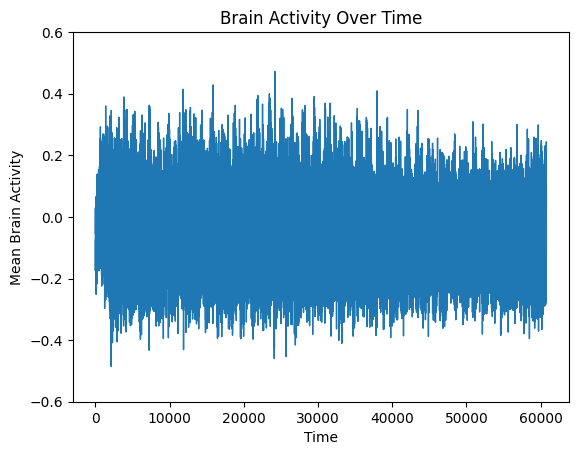

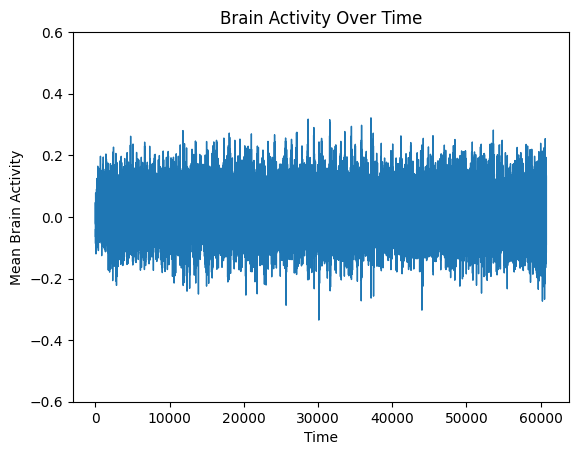

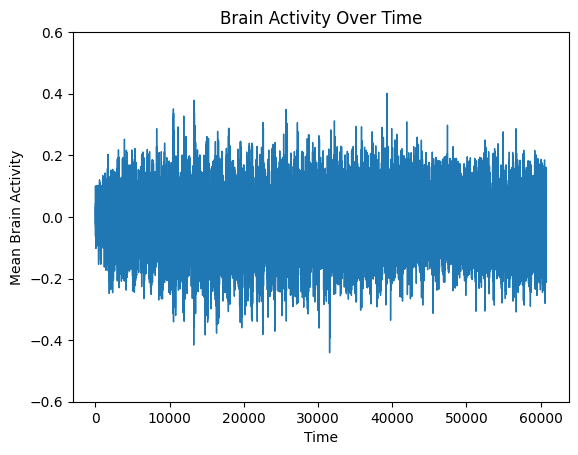

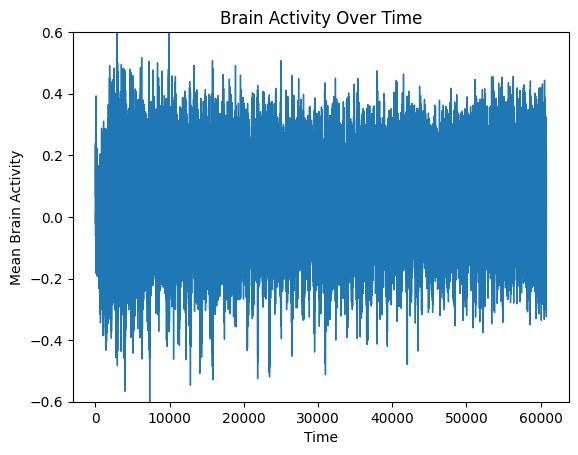

In [127]:
#import ax. module
import matplotlib.pyplot as plt

mean_activity = np.mean(test1[:,0,:], axis=1)  # Average over voxels
plt.plot(mean_activity, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity1 = np.mean(test1[:,1,:], axis=1)  # Average over voxels
plt.plot(mean_activity1, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity2 = np.mean(test1[:,2,:], axis=1)  # Average over voxels
plt.plot(mean_activity2, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

mean_activity3 = np.mean(test1[:,3,:], axis=1)  # Average over voxels
plt.plot(mean_activity3, linewidth=1
         )
plt.xlabel("Time")
plt.ylabel("Mean Brain Activity")
plt.title("Brain Activity Over Time")
plt.ylim(-0.6, 0.6)
plt.show()

Using this activity information, we can use different analysis methods to predict the genres.
i.e a decoding model: classification model
- Logistic regression(HW 1 P2) misnomer! classification
- Support Vector Machine (SVM) classification
- Linear Discriminant Analysis (LDA) classification
- Naive Bayes classifiers classification
- K-Nearest Neighbors (KNN) either classification or regression

Try to load and visualize the training data:

In [106]:
training1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Training.npy")

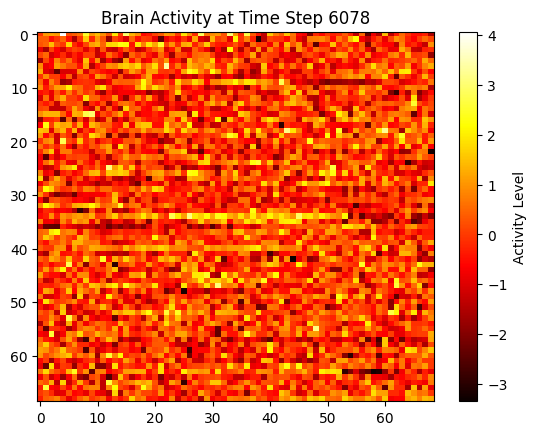

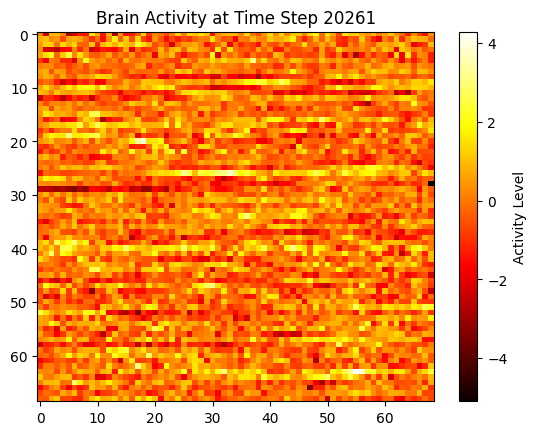

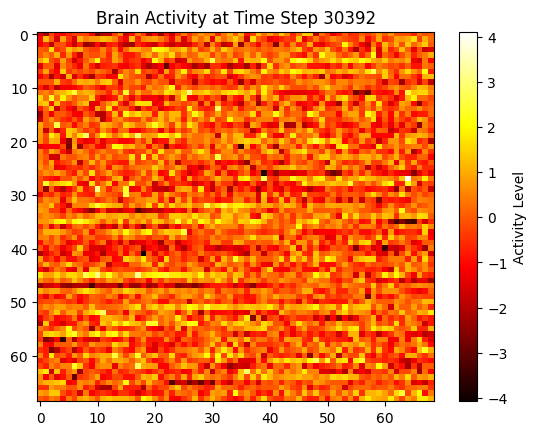

In [109]:
# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 10
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()

# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 3
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()

# Select a time step (e.g., middle of the recording)
timestep = training1.shape[0] // 2
voxel_data = training1[timestep, :]  # Get voxel activity at this time step

# Reshape the voxel data into a square-like shape
image_size = int(np.sqrt(4800))  # Find the closest square shape
voxel_image = voxel_data[:image_size**2].reshape(image_size, image_size)  # Reshape

# Plot the 2D representation of brain activity
plt.imshow(voxel_image, cmap="hot", aspect="auto")
plt.colorbar(label="Activity Level")
plt.title(f"Brain Activity at Time Step {timestep}")
plt.show()


This animation of fmri activity over time is not working, would be cool to debug this tho...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


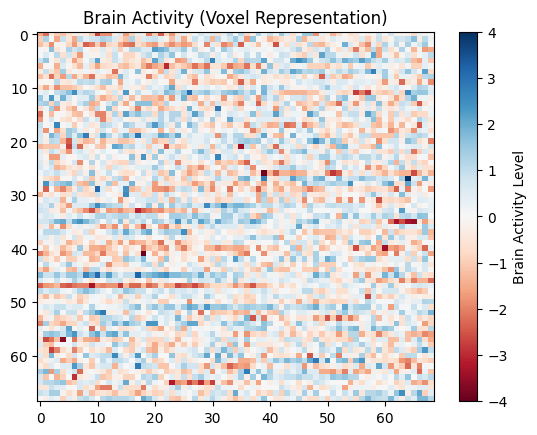

In [110]:
import matplotlib.animation as animation

image_size = int(np.sqrt(4800))

fig, ax = plt.subplots()
cax = ax.imshow(np.zeros((image_size, image_size)), cmap="hot", aspect="auto")

def update(frame):
    voxel_data = fmri_data[frame, :image_size**2].reshape(image_size, image_size)
    voxel_image = (voxel_data - np.min(voxel_data)) / (np.max(voxel_data) - np.min(voxel_data))
    cax.set_array(voxel_image)
    ax.set_title(f"Time Step {frame}")

ani = animation.FuncAnimation(fig, update, frames=100, interval=50)

plt.imshow(voxel_image, cmap="RdBu", aspect="auto", vmin=-4, vmax=4)
plt.colorbar(label="Brain Activity Level")
plt.title("Brain Activity (Voxel Representation)")
plt.show()



Idk if im implementing this PCA right...

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D
reduced_data = pca.fit_transform(test1[:,0,:])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Brain Activity PCA Projection")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-0.10458297 -1.6825694   1.4527063  ...  0.632605   -1.6086347
 -0.15148683].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [125]:
testmean1 = np.load("/Users/jenniferarakaki/Documents/neuro120/8275363/sub-001_Resp_Test_Mean.npy")

In [139]:
print(testmean1.shape)
print("There are 60784 time points and each one includes recordings of 600 time points.")

print((testmean1[1,:]).shape)

(60784, 600)
There are 60784 time points and each one includes recordings of 600 time points.
(600,)
